Inteligência Computacional 

Amanda
Ana Maria Brito
Leonardo 

Tarefa: Utilizando o Método do gradiente mostrados nos slides e vídeos do tópico 3, aproximar a saída 
para f(x) = x²

## Bibliotecas e parâmetros

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# learning_rate, number of iterations, number of inputs
alpha = 0.01
gen = 1000
num_x_points = 1000

## Visualização das Gaussianas iniciais

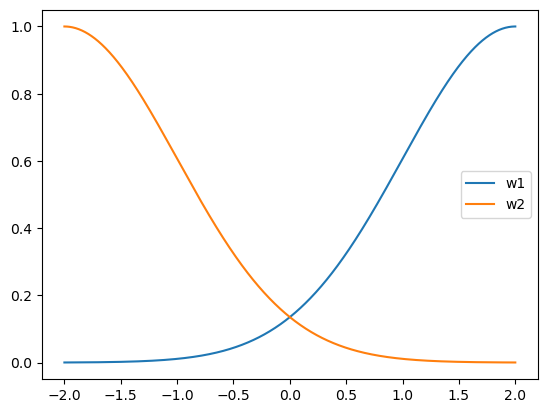

In [2]:
x_range = np.linspace(-2,2,num_x_points)

mf1 = np.exp(-0.5*(x_range-2/1)**2)
mf2 = np.exp(-0.5*(x_range+2/1)**2)

fig, ax = plt.subplots()
plt.plot(x_range, mf1, label='w1')
plt.plot(x_range, mf2, label='w2')
ax.legend()

## Inicialização das variáveis

In [3]:
desvio1 = 1
desvio2 = 1
media1 = -2
media2 = 2

p1 = np.random.sample()
p2 = np.random.sample()
q1 = np.random.sample()
q2 = np.random.sample()

## Derivada em relação ao erro

In [4]:
x_plot, y_plot = [], []
points = np.linspace(-2,2,100)
x_plot.append(points)
for _ in range(gen):
    # Embaralhamos os pontos de entrada
    np.random.shuffle(x_range)
    for x in x_range:
        y1 = p1*x + q1
        y2 = p2*x + q2
        w1 = np.exp(-0.5*(x-media1/desvio1)**2)
        w2 = np.exp(-0.5*(x-media2/desvio2)**2)

        y = (w1*y1 + w2*y2)/(w1+w2)

        # Calculamos a próxima iteração de variáveis (antiga menos alfa vezes gradiente)
        desvio1 = desvio1 - alpha * (y-(x**2)) * w2 * ((y1 - y2) / (w1+w2)**2) * w1 * ((x-media1)**2 / desvio1**3)
        desvio2 = desvio2 - alpha * (y-(x**2)) * w1 * ((y2 - y1) / (w1+w2)**2) * w2 * ((x-media2)**2 / desvio2**3)

        media1 = media1 - alpha * (y-(x**2)) * w2 * ((y1-y2)/(w1+w2)**2) * w1 * ((x-media1)/desvio1**2)
        media2 = media2 - alpha * (y-(x**2)) * w1 * ((y2-y1)/(w1+w2)**2) * w2 * ((x-media2)/desvio2**2)

        p1 = p1 - alpha * (y-(x**2)) * x * w1 / (w1+w2)
        p2 = p2 - alpha * (y-(x**2)) * x * w2 / (w1+w2)

        q1 = q1 - alpha * (y-(x**2)) * w1 / (w1+w2)
        q2 = q2 - alpha * (y-(x**2)) * w2 / (w1+w2)

    # Armazenamos dados para calcular erro e plottar
    y1 = p1*points + q1
    y2 = p2*points + q2
    w1 = np.exp(-0.5*(points-media1/desvio1)**2)
    w2 = np.exp(-0.5*(points-media2/desvio2)**2)
    predict = (w1*y1 + w2*y2)/(w1+w2)
    y_plot.append(predict)
    print(f'Gen: {_}, Error: {0.5*(y-x**2)**2}')

Gen: 0, Error: 0.09964934206966652
Gen: 1, Error: 0.03133463814070394
Gen: 2, Error: 0.030591238711469234
Gen: 3, Error: 0.05237519435589946
Gen: 4, Error: 0.000442099347229147
Gen: 5, Error: 0.046703183503384794
Gen: 6, Error: 0.006929852297527982
Gen: 7, Error: 0.013560560070593631
Gen: 8, Error: 0.0060464264092712945
Gen: 9, Error: 0.019541625577392557
Gen: 10, Error: 0.01134347124228485
Gen: 11, Error: 0.0037097475683494493
Gen: 12, Error: 0.008353678429425134
Gen: 13, Error: 0.00887435920523588
Gen: 14, Error: 0.007865509754828122
Gen: 15, Error: 0.0008854727816263936
Gen: 16, Error: 0.0065791055162742655
Gen: 17, Error: 0.0019096489455983168
Gen: 18, Error: 1.53350410236584e-05
Gen: 19, Error: 0.00010623724214234531
Gen: 20, Error: 0.003950598053000036
Gen: 21, Error: 0.005001520938595787
Gen: 22, Error: 6.357887467615832e-05
Gen: 23, Error: 0.003568670869550175
Gen: 24, Error: 0.005537156875244809
Gen: 25, Error: 0.0020292386960376095
Gen: 26, Error: 0.021964175569345813
Gen: 27

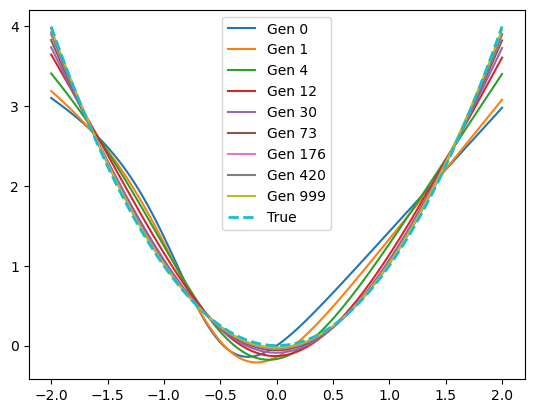

In [5]:
for i in np.logspace(0, np.log10(len(y_plot)), num=9, endpoint=True).astype(int)-1:
    plt.plot(x_plot[0], y_plot[i], label=f'Gen {i}')
plt.plot(x_plot[0], x_plot[0]**2, label='True', linestyle='--', linewidth=2)
plt.legend()
plt.show()

In [6]:
# Mostra mais do início onde o gradiente é maior
np.logspace(0, np.log10(100), num=10, endpoint=True).astype(int)

array([  1,   1,   2,   4,   7,  12,  21,  35,  59, 100])